In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import copy

In [3]:
train_file=pd.read_csv("Gotem Pumpkins.csv",index_col=0)
test_file=pd.read_csv("Freyja_Pumpkins.csv",index_col=0)
train_file

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,Ürgüp Sivrisi
1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,Ürgüp Sivrisi
2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,Ürgüp Sivrisi
3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,Çerçevelik
4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,68292,982.052,368.6867,237.1654,68891,294.8764,0.7656,0.9913,0.7212,0.8898,1.5546,0.7998,Çerçevelik
1996,82272,1121.769,459.4482,228.2780,82865,323.6541,0.8678,0.9928,0.7321,0.8216,2.0127,0.7044,Ürgüp Sivrisi
1997,72049,1023.784,398.3945,230.5932,72732,302.8789,0.8155,0.9906,0.7638,0.8638,1.7277,0.7602,Çerçevelik
1998,73703,1065.980,422.3591,223.3923,74461,306.3357,0.8487,0.9898,0.6380,0.8151,1.8907,0.7253,Çerçevelik


In [4]:
train_file.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object

In [5]:
train_file["Label"]=(train_file["Class"]=="Ürgüp Sivrisi").astype(int)
test_file["Label"]=(test_file["Class"]=="Ürgüp Sivrisi").astype(int)
y_train=train_file["Label"]
y_test=test_file["Label"]

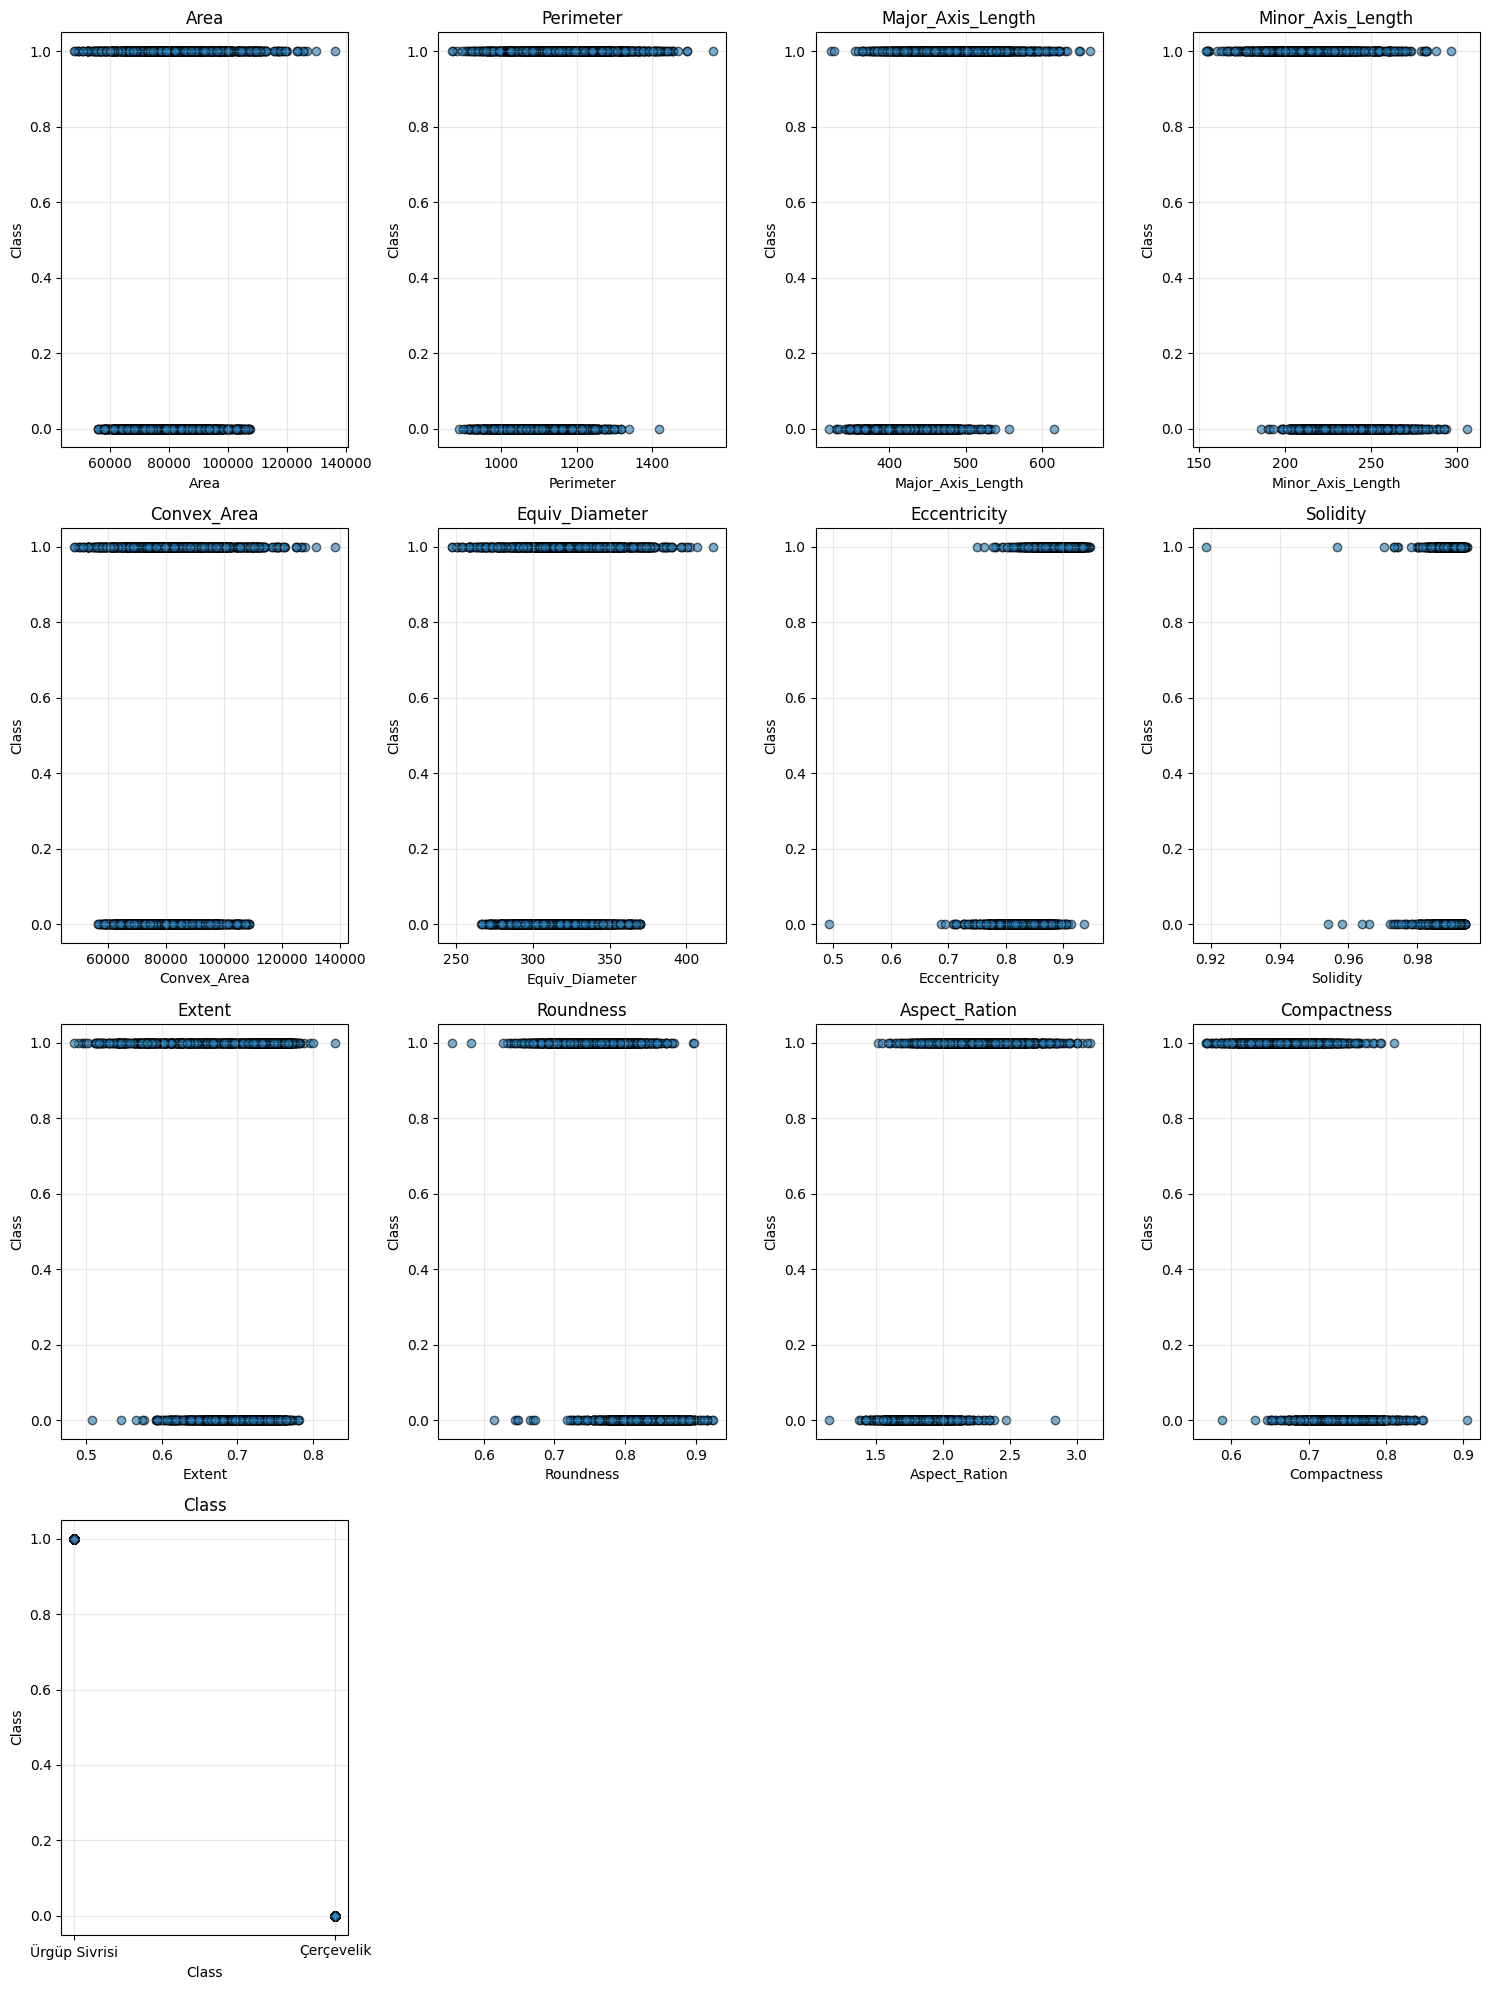

In [6]:
plt.figure(figsize=(15, 20))

for i,col in enumerate(train_file.columns.drop('Label'),1):
    plt.subplot(4, 4, i)
    plt.scatter(train_file[col], train_file['Label'], alpha=0.6, edgecolor='k')
    plt.title(col, fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Class", fontsize=10)
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_file[num_cols] = scaler.fit_transform(train_file[num_cols])  # fit + transform
test_file[num_cols] = scaler.transform(test_file[num_cols])  # only transform

In [10]:
X_train=train_file[num_cols].values.astype('float64')
y_train=train_file["Label"].values.astype('float64')
X_test=test_file[num_cols].values.astype('float64')
y_test=test_file["Label"].values.astype('float64')

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

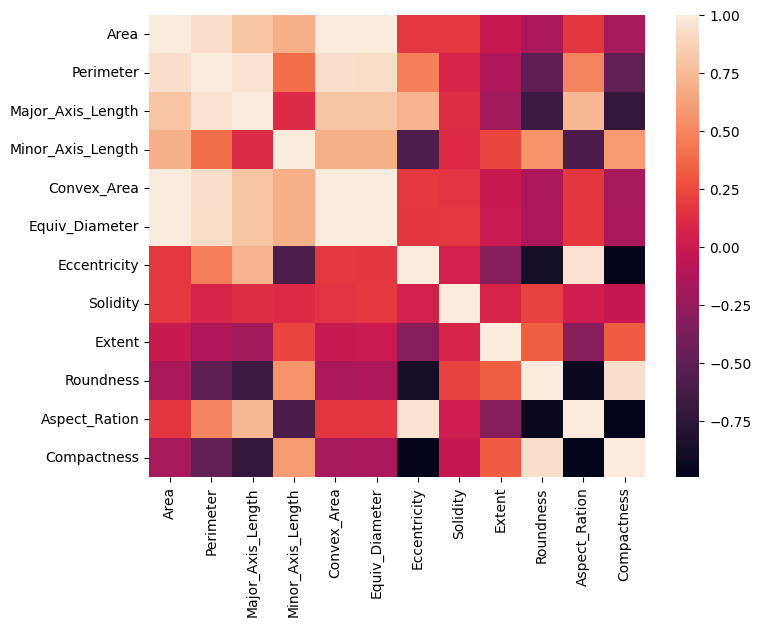

In [11]:
num_cols=train_file.select_dtypes(include=[np.number]).columns.drop("Label")
train_file_num=train_file[num_cols]
corr_matrix=train_file_num.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix)
plt.plot

In [12]:
#from sklearn.linear_model import LogisticRegression
#lr_model = LogisticRegression()
#lr_model.fit(X_train, y_train)
#y_pred = lr_model.predict(X_test)
#print("Weights on training set:",lr_model.coef_)
#print("Bias on training set:",lr_model.intercept_)

In [13]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # prevent overflow
    return 1 / (1 + np.exp(-z))

In [14]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    z_i=np.dot(X,w)+b
    f_wb_i=sigmoid(z_i)
    f_wb_i = np.clip(f_wb_i, 1e-15, 1 - 1e-15)
    cost=cost-y*np.log(f_wb_i)-(1-y)*np.log(1-f_wb_i)
    return np.mean(cost)

In [15]:
def gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0.0
    f_wb_i=sigmoid(np.dot(X,w)+b)
    f_wb_i = np.clip(f_wb_i, 1e-15, 1 - 1e-15)
    error=f_wb_i-y
    dj_dw = (1 / m) * np.dot(X.T, error)
    dj_db = (1 / m) * np.sum(error)
    dj_dw/=m
    dj_db/=m
    return dj_db,dj_dw

In [16]:
def grad_descent(X,y,w_in,b_in,alpha,num_iters):
    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(num_iters):
        dj_db,dj_dw=gradient(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        J_history.append(compute_cost(X, y, w, b))
        if i%100 == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
    return w, b, J_history       

In [26]:
w_init=np.zeros(X_train.shape[1])
b_init=0.
alpha=1
itr=100000
weight,bias,cost=grad_descent(X_train,y_train,w_init,b_init,alpha,itr)
print("Final Weights :",weight)
print("Final bias :", bias)
print("Final cost :",cost[-1])

Iteration    0: Cost 0.6928065379068512
Iteration  100: Cost 0.6609629038232113
Iteration  200: Cost 0.63311138208963
Iteration  300: Cost 0.6086922738928776
Iteration  400: Cost 0.5872118980750062
Iteration  500: Cost 0.5682435834856776
Iteration  600: Cost 0.551423504143496
Iteration  700: Cost 0.5364439730256945
Iteration  800: Cost 0.5230459253060845
Iteration  900: Cost 0.5110115898754173
Iteration 1000: Cost 0.5001578426608528
Iteration 1100: Cost 0.4903304261421793
Iteration 1200: Cost 0.48139904897252495
Iteration 1300: Cost 0.4732532963128837
Iteration 1400: Cost 0.4657992485904227
Iteration 1500: Cost 0.4589567004195934
Iteration 1600: Cost 0.45265687848772745
Iteration 1700: Cost 0.4468405695589041
Iteration 1800: Cost 0.4414565833361942
Iteration 1900: Cost 0.4364604877916098
Iteration 2000: Cost 0.4318135659202025
Iteration 2100: Cost 0.42748195248771503
Iteration 2200: Cost 0.4234359172923771
Iteration 2300: Cost 0.4196492679418543
Iteration 2400: Cost 0.41609885038059985

In [24]:
z_train = np.dot(X_train, weight) + bias
y_train_pred = sigmoid(z_train) >= 0.5  # Threshold at 0.5

z_test = np.dot(X_test, weight) + bias
y_test_pred = sigmoid(z_test) >= 0.5

print(y_test_pred.astype(int))
print(y_test.astype(int))

[0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 0 

In [30]:
def function(w,b,x):
    f = np.dot(x,w)+b
    return f

In [31]:
def prediction(probabality):
    return np.where(probabality>= 0.5,1,0)

def accuracy(w,b,x,y):
    n = len(y)
    pred = prediction(sigmoid(function(w,b,x)))
    correct =0
    for i in range(n):
        if pred[i] == y[i]:
            correct+=1
    return 100*correct/n
print(f"Accuracy of model for train data= {accuracy(weight,bias,X_train,y_train)} %")
print(f"accuracy of model for test data = {accuracy(weight,bias,X_test,y_test)} %")

Accuracy of model for train data= 86.95 %
accuracy of model for test data = 88.4 %


In [38]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix for Test")
print(confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix for Train")
print(confusion_matrix(y_train, y_train_pred))

Confusion Matrix for Test
[[233  35]
 [ 24 208]]
Confusion Matrix for Train
[[918 114]
 [150 818]]


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score in Test",precision_score(y_test,y_test_pred))
print("Recall score in Test",recall_score(y_test,y_test_pred))
print("F1 score in Test",f1_score(y_test,y_test_pred))
print("Precision score in Train",precision_score(y_train,y_train_pred))
print("Recall score in Train",recall_score(y_train,y_train_pred))
print("F1 score in Test",f1_score(y_train,y_train_pred))

Precision score in Test 0.8559670781893004
Recall score in Test 0.896551724137931
F1 score in Test 0.8757894736842106
Precision score in Train 0.8776824034334764
Recall score in Train 0.8450413223140496
F1 score in Test 0.8610526315789474


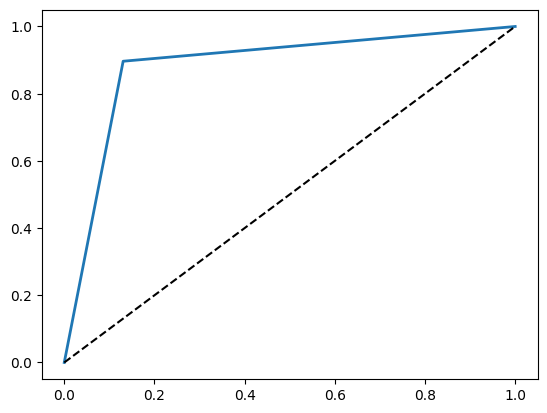

0.882977354606279


In [43]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_test_pred)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr,tpr)
plt.show()
print(roc_auc_score(y_test,y_test_pred))